In [1]:
# Базовая настройка: импорты и стиль
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter
from matplotlib.colors import ListedColormap

# фиксируем случайность для воспроизводимости
rng = np.random.default_rng(42)

# Настроим некоторые параметры отображения по умолчанию
mpl.rcParams.update({
    "figure.figsize": (7, 4),  # размер фигур по умолчанию
    "axes.grid": True,         # сетка по умолчанию
    "grid.alpha": 0.25,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "font.size": 10,
})

print("Версия Matplotlib:", mpl.__version__)


Версия Matplotlib: 3.10.7


## 1. Самый простой линейный график

Используем `plt.plot` для отображения функции. Покажем подписи осей и заголовок.


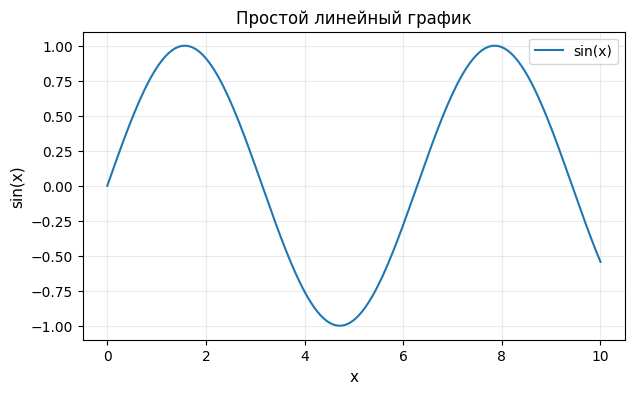

In [2]:
# Генерируем данные для простой демонстрации
x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.figure()
plt.plot(x, y, color="C0", label="sin(x)")  # базовая линия
plt.title("Простой линейный график")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()


## 2. Стиль линий, маркеры и цвета

Параметры `color`, `linestyle`, `linewidth`, `marker`, `markersize` позволяют разнообразить графики.


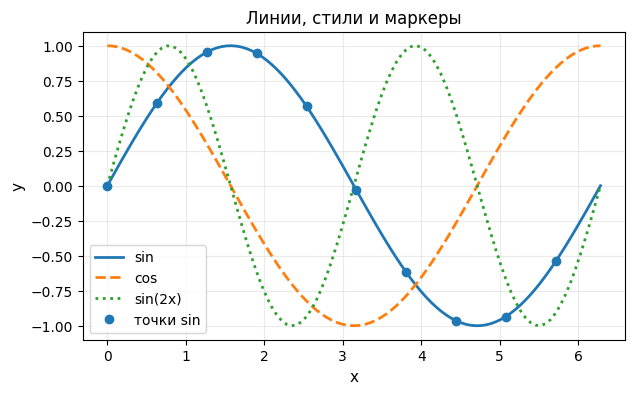

In [3]:
# Несколько линий с разным стилем
x = np.linspace(0, 2*np.pi, 100)
plt.figure()
plt.plot(x, np.sin(x), color="tab:blue", linestyle="-",  linewidth=2, label="sin")
plt.plot(x, np.cos(x), color="tab:orange", linestyle="--", linewidth=2, label="cos")
plt.plot(x, np.sin(2*x), color="tab:green", linestyle=":", linewidth=2, label="sin(2x)")

# добавим маркеры
plt.plot(x[::10], np.sin(x)[::10], marker="o", linestyle="", color="tab:blue", label="точки sin")

plt.title("Линии, стили и маркеры")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## 3. Фигуры и оси: `plt.figure`, `plt.subplots`

Использование `plt.subplots` удобно для создания сетки подграфиков и совместного управления ими.


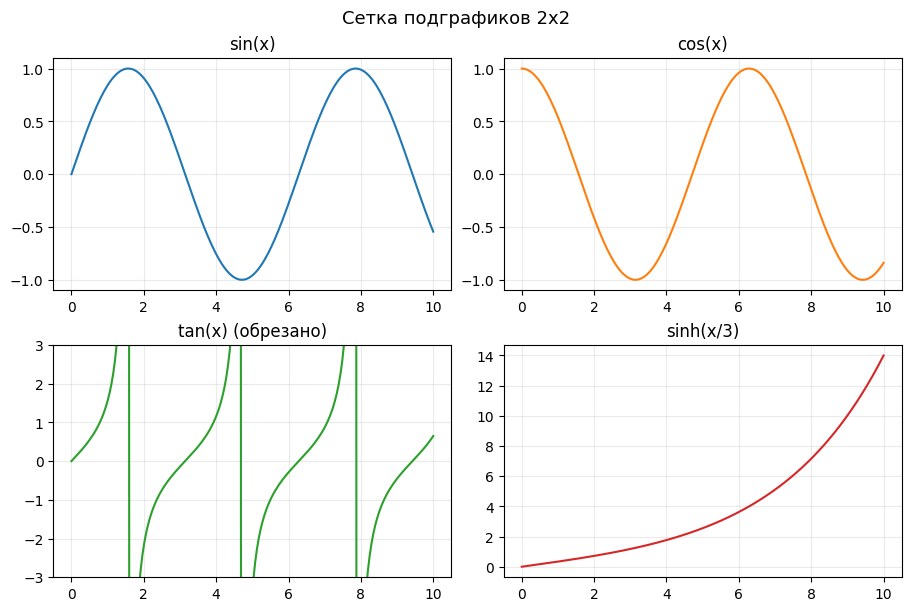

In [4]:
# Создадим сетку 2x2 подграфиков
x = np.linspace(0, 10, 200)
fig, axes = plt.subplots(2, 2, figsize=(9, 6), constrained_layout=True)

axes[0, 0].plot(x, np.sin(x), color="C0")
axes[0, 0].set_title("sin(x)")

axes[0, 1].plot(x, np.cos(x), color="C1")
axes[0, 1].set_title("cos(x)")

axes[1, 0].plot(x, np.tan(x), color="C2")
axes[1, 0].set_ylim(-3, 3)
axes[1, 0].set_title("tan(x) (обрезано)")

axes[1, 1].plot(x, np.sinh(x/3), color="C3")
axes[1, 1].set_title("sinh(x/3)")

fig.suptitle("Сетка подграфиков 2x2", fontsize=13)
plt.show()


## 4. Точечные диаграммы (scatter) и цветовые карты

Цвет (`c`) и размер (`s`) маркеров можно кодировать данными. Плюс — цветовые карты (`cmap`).


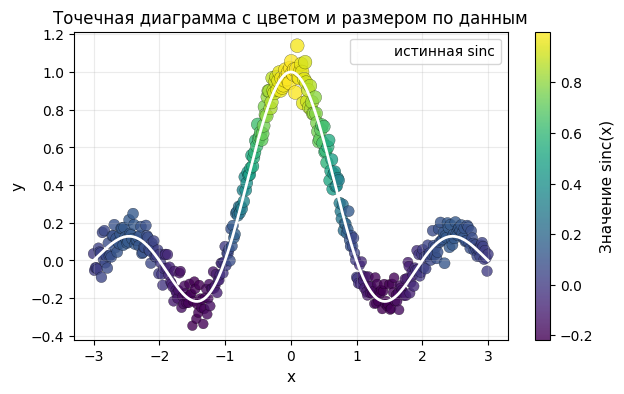

In [18]:
# Сгенерируем точки вокруг кривой
x = np.linspace(-3, 3, 400)
y_true = np.sinc(x)
y_noisy = y_true + rng.normal(scale=0.05, size=x.shape)
sizes = 50 * (1 + (y_true - y_true.min()) / (np.ptp(y_true) + 1e-9))  # масштабируем размеры
colors = y_true  # цвет кодируем истинным значением функции

plt.figure()
sc = plt.scatter(
    x,                  # массив X-координат точек (shape: (N,))
    y_noisy,            # массив Y-координат точек (shape: (N,))
    c=colors,           # цвет каждой точки: массив значений (N,) — прокрашивается через cmap
    s=sizes,            # размер маркера: массив/скаляр; в pt^2 (квадраты поинтов), можно масштабировать
    cmap="viridis",     # цветовая карта для преобразования значений c -> цветов
    alpha=0.8,          # прозрачность маркеров (0 — прозрачно, 1 — непрозрачно)
    edgecolor="k",      # цвет обводки маркера ('k' = black)
    linewidth=0.2       # толщина линии обводки маркера
)
plt.plot(x, y_true, color="white", linewidth=2, label="истинная sinc")
plt.colorbar(sc, label="Значение sinc(x)")
plt.title("Точечная диаграмма с цветом и размером по данным")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## 5. Столбчатые диаграммы (bar), в том числе горизонтальные и с погрешностями

Покажем вертикальные/горизонтальные столбики и ошибочные бары (`yerr`).


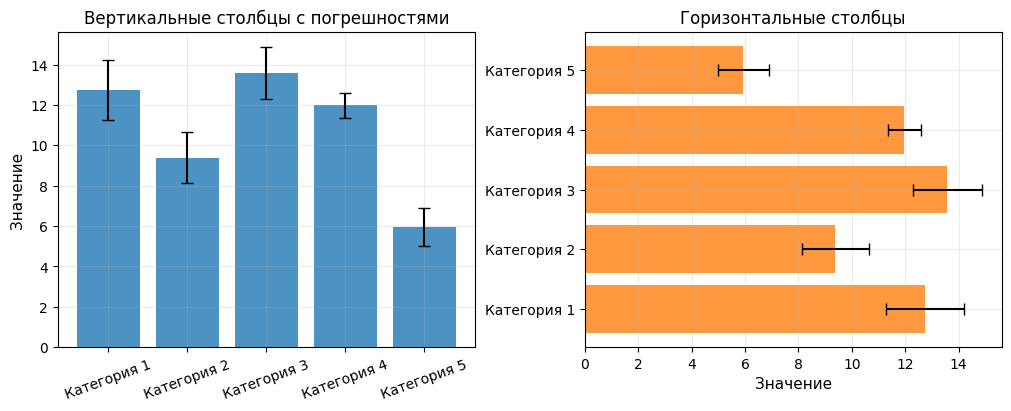

In [2]:
# Сгенерируем категории и значения
categories = [f"Категория {i}" for i in range(1, 6)]
values = rng.uniform(5, 15, size=len(categories))
errors = rng.uniform(0.5, 1.5, size=len(categories))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

# Вертикальные столбцы с погрешностями
ax1.bar(categories, values, yerr=errors, capsize=4, color="C0", alpha=0.8)
ax1.set_title("Вертикальные столбцы с погрешностями")
ax1.set_ylabel("Значение")
ax1.tick_params(axis='x', labelrotation=20)

# Горизонтальные столбцы
ax2.barh(categories, values, xerr=errors, capsize=4, color="C1", alpha=0.8)
ax2.set_title("Горизонтальные столбцы")
ax2.set_xlabel("Значение")

plt.show()


## 6. Гистограммы, Вайленплоты и распределения



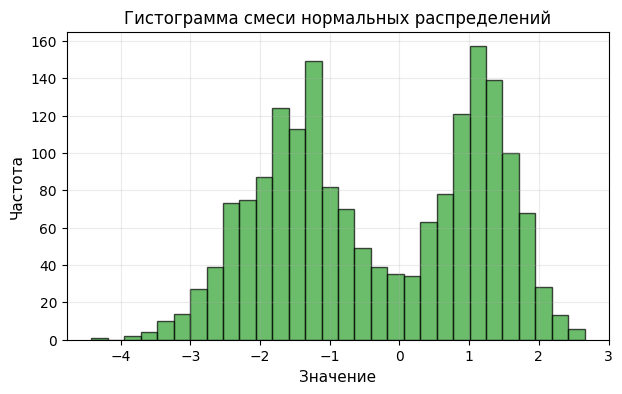

In [3]:
# Смесь нормальных распределений
x1 = rng.normal(loc=-1.5, scale=0.8, size=1000)
x2 = rng.normal(loc=1.2,  scale=0.5, size=800)
data = np.concatenate([x1, x2])

plt.figure()
plt.hist(data, bins=30, color="C2", alpha=0.7, edgecolor="black")
plt.title("Гистограмма смеси нормальных распределений")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()


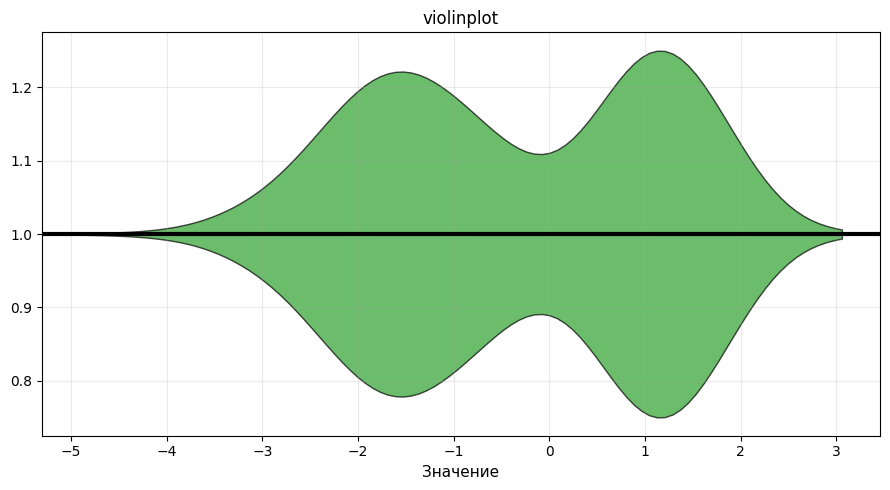

In [32]:
# Violinplot горизонтально для той же смеси распределений (без вертикальных синих линий)
x1 = rng.normal(loc=-1.5, scale=0.8, size=1000)
x2 = rng.normal(loc=1.2,  scale=0.5, size=800)
data = np.concatenate([x1, x2])

fig, ax = plt.subplots(figsize=(9, 5))

# Отключаем отображение средних/медиан/экстремумов, чтобы убрать вертикальные синие линии
parts = ax.violinplot(
    [data],
    vert=False,
    showmeans=False,
    showmedians=False,
    showextrema=False,
    bw_method=0.3,
)

# Оформление "тела" скрипки
for body in parts['bodies']:
    body.set_facecolor("C2")
    body.set_edgecolor("black")
    body.set_alpha(0.7)
    body.set_linewidth(1.0)

# Толстая чёрная линия на y=0
ax.axhline(1, color='k', linewidth=3)

# Оси и подписи
ax.set_xlabel("Значение")
ax.set_title("violinplot")

plt.tight_layout()
plt.show()

## 7. Круговые диаграммы (pie) и "пончики"

Используем `plt.pie` и сделаем вариант с отверстием (donut chart).


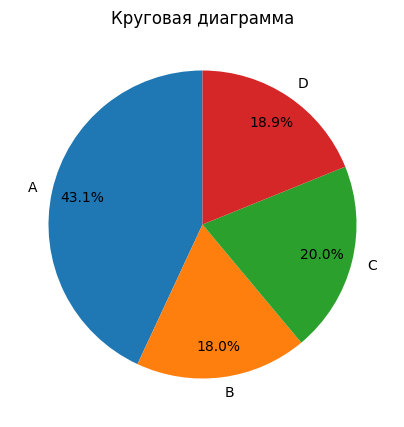

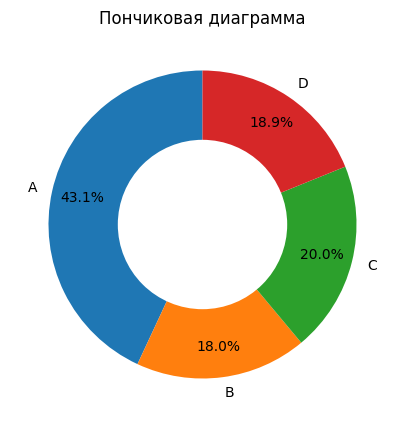

In [4]:
# Процентное распределение
labels = ["A", "B", "C", "D"]
sizes = rng.uniform(10, 40, size=4)
sizes = sizes / sizes.sum()  # нормируем до 1

fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%",
    startangle=90,
    pctdistance=0.8,
)
ax.set_title("Круговая диаграмма")
plt.show()

# Donut (пончиковая) диаграмма — добавим белый круг в центр
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%",
    startangle=90,
    pctdistance=0.8,
)
center_circle = plt.Circle((0, 0), 0.55, fc="white")
ax.add_artist(center_circle)
ax.set_title("Пончиковая диаграмма")
plt.show()


## 8. Коробчатые диаграммы (boxplot) и скрипичные (violinplot)

Сравним распределения разных групп с помощью `boxplot` и `violinplot`.


/var/folders/h3/3z04v7dj4_9b708397ldbx480000gn/T/ipykernel_26788/3478079027.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data_groups, labels=labels, patch_artist=True)


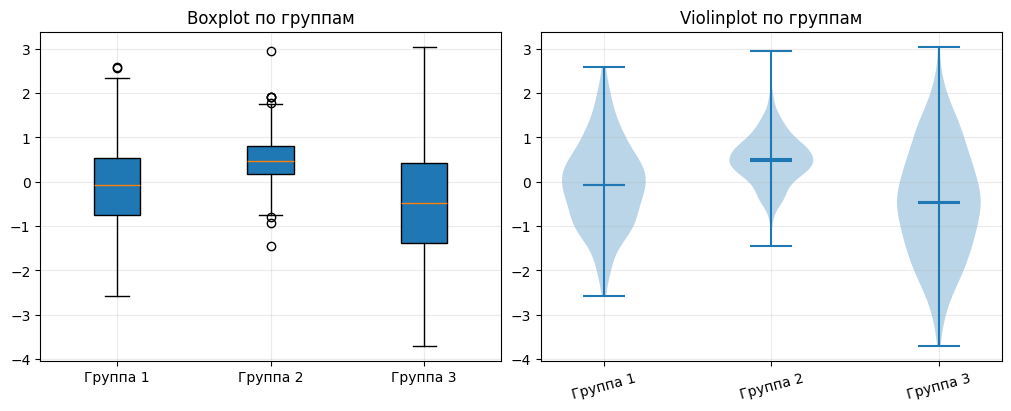

In [36]:
# Сгенерируем данные для трёх групп
G1 = rng.normal(0.0, 1.0, size=300)
G2 = rng.normal(0.5, 0.6, size=300)
G3 = rng.normal(-0.5, 1.2, size=300)
data_groups = [G1, G2, G3]
labels = ["Группа 1", "Группа 2", "Группа 3"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
ax1.boxplot(data_groups, labels=labels, patch_artist=True)
ax1.set_title("Boxplot по группам")

parts = ax2.violinplot(data_groups, showmeans=True, showmedians=True)
ax2.set_title("Violinplot по группам")
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(labels, rotation=15)

plt.show()


## 9. Работа с датами и временными рядами

Matplotlib умеет работать с датами. Покажем простой временной ряд с форматированием оси X.


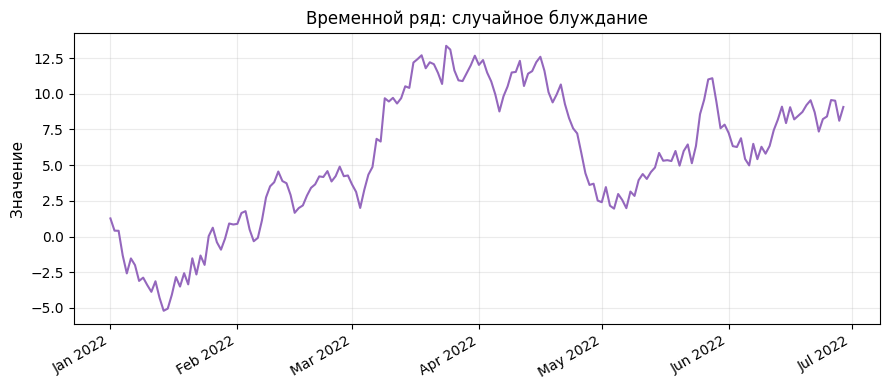

In [8]:
import datetime as dt
import matplotlib.dates as mdates

# Сгенерируем даты и значения
start = dt.date(2022, 1, 1)
dates = np.array([start + dt.timedelta(days=i) for i in range(180)])
values = np.cumsum(rng.normal(0, 1, size=len(dates)))  # случайное блуждание

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(dates, values, color="C4")
ax.set_title("Временной ряд: случайное блуждание")
ax.set_ylabel("Значение")

# Форматирование дат на оси X
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()


## 10. Тепловые карты и `imshow`

Сгенерируем матрицу и покажем как настроить цветовую карту, цветовую шкалу и подписи осей.


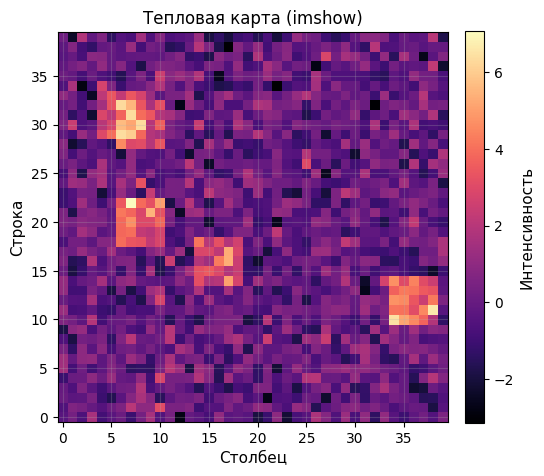

In [9]:
# Сгенерируем матрицу с локальными структурами
N = 40
M = rng.normal(0, 1, size=(N, N))
# Добавим "горячие" пятна
for _ in range(5):
    i, j = rng.integers(0, N, size=2)
    M[max(0, i-2):min(N, i+3), max(0, j-2):min(N, j+3)] += rng.uniform(2, 4)

fig, ax = plt.subplots(figsize=(5.5, 5))
im = ax.imshow(M, cmap="magma", origin="lower")
ax.set_title("Тепловая карта (imshow)")
ax.set_xlabel("Столбец")
ax.set_ylabel("Строка")
cb = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cb.set_label("Интенсивность")
plt.tight_layout()
plt.show()


## 11. Аннотации, стрелки и текст

Добавим подписи точек, текст на графике и стрелки (`annotate`).


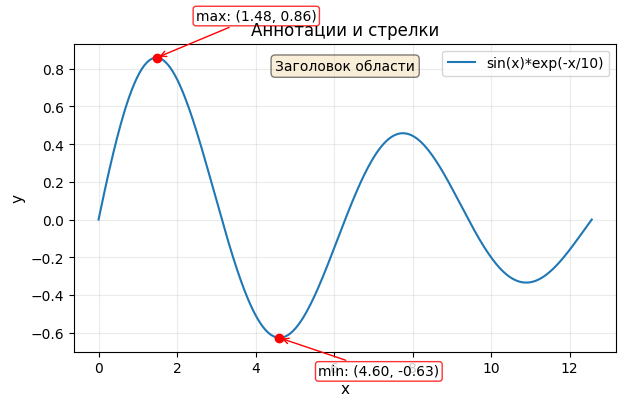

In [34]:
# Возьмём кривую и отметим экстремумы
from typing import Any


x = np.linspace(0, 4*np.pi, 400)
y = np.sin(x) * np.exp(-x/10)

fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)*exp(-x/10)")
ax.set_title("Аннотации и стрелки")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Найдём максимум и минимум (приближённо)
i_max = np.argmax(y)
i_min = np.argmin(y)
for idx, label in [(i_max, "max"), (i_min, "min")]:
    ax.scatter(x[idx], y[idx], color="red", zorder=3)
    ax.annotate(
        f"{label}: ({x[idx]:.2f}, {y[idx]:.2f})",
        xy=(x[idx], y[idx]),
        xytext=(x[idx] + 1.0, y[idx] + (0.2 if label=="max" else -0.2)),
        arrowprops=dict[str, Any](arrowstyle="->", color="red"),
        bbox=dict[str, str | float](boxstyle="round,pad=0.2", fc="white", ec="red", alpha=0.8)
    )

ax.text(0.5, 0.95, "Заголовок области", transform=ax.transAxes, ha="center", va="top",
        bbox=dict[str, str | float](boxstyle="round", fc="wheat", alpha=0.5))
ax.legend()
plt.show()


## 12. Две шкалы на одном графике (twinx)

Иногда полезно показать два разных масштаба Y на одной оси X. Используем `ax.twinx()`.


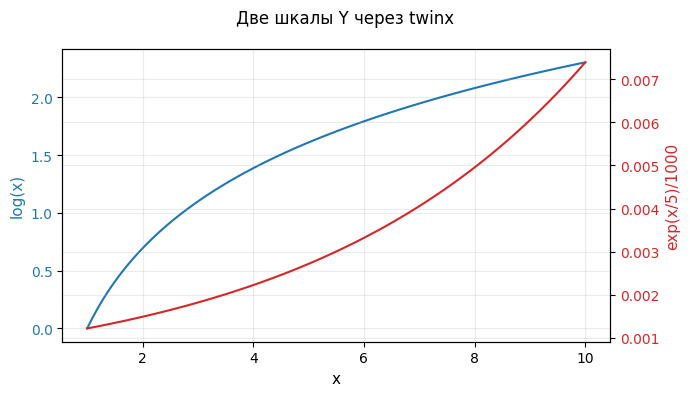

In [11]:
# Одна ось X, две разные оси Y
x = np.linspace(1, 10, 100)
y1 = np.log(x)              # медленный рост
y2 = np.exp(x/5) / 1000.0   # быстрый рост

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color="C0", label="log(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("log(x)", color="C0")
ax1.tick_params(axis='y', labelcolor="C0")

ax2 = ax1.twinx()
ax2.plot(x, y2, color="C3", label="exp(x/5)/1000")
ax2.set_ylabel("exp(x/5)/1000", color="C3")
ax2.tick_params(axis='y', labelcolor="C3")

fig.suptitle("Две шкалы Y через twinx")
fig.tight_layout()
plt.show()


## 13. Логарифмические шкалы и специализированные форматтеры

Покажем логарифмическую ось Y и пользовательский форматтер для подписей.


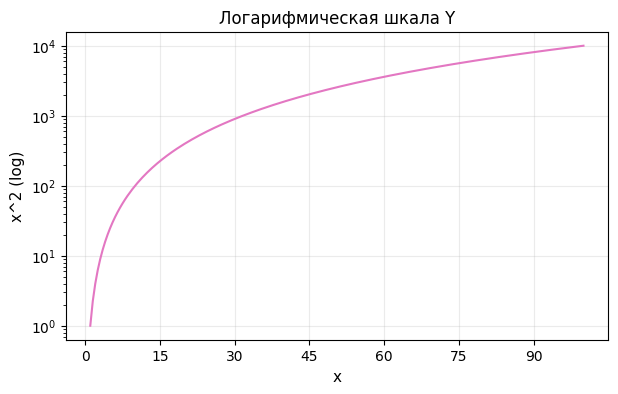

In [12]:
# Показ логарифмической шкалы и своего форматтера
x = np.linspace(1, 100, 200)
y = x**2

fig, ax = plt.subplots()
ax.plot(x, y, color="C6")
ax.set_yscale('log')  # логарифмическая ось Y
ax.set_title("Логарифмическая шкала Y")
ax.set_xlabel("x")
ax.set_ylabel("x^2 (log)")

# Пользовательский форматтер оси X (например, показывать целые без знаков после запятой)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v)}"))

plt.show()


## 14. 3D-графики (surface, scatter3D)

Используем `mpl_toolkits.mplot3d` для трёхмерных визуализаций.


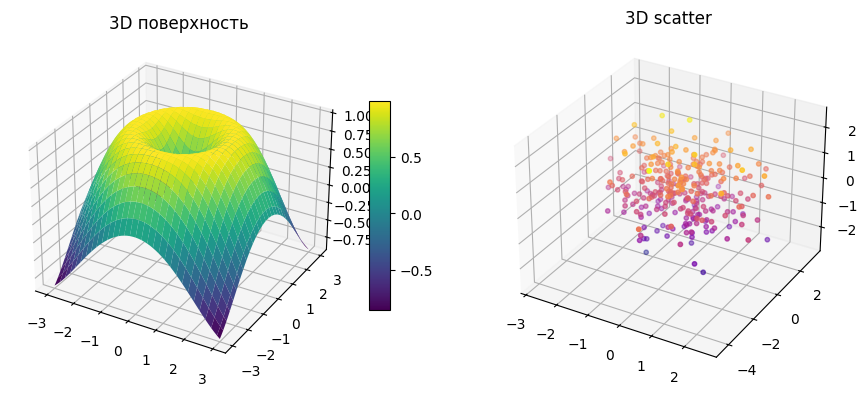

In [13]:
# 3D поверхность и облако точек
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (импорт активирует 3D)

# Поверхность Z = f(X, Y)
x = np.linspace(-3, 3, 60)
y = np.linspace(-3, 3, 60)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
ax.set_title("3D поверхность")

# Облако точек в 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
pts = rng.normal(size=(300, 3))
ax2.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=10, c=pts[:, 2], cmap='plasma')
ax2.set_title("3D scatter")
plt.tight_layout()
plt.show()


## 15. Стили Matplotlib (`plt.style`)

Matplotlib поддерживает различные предустановленные стили. Посмотрим пару примеров.


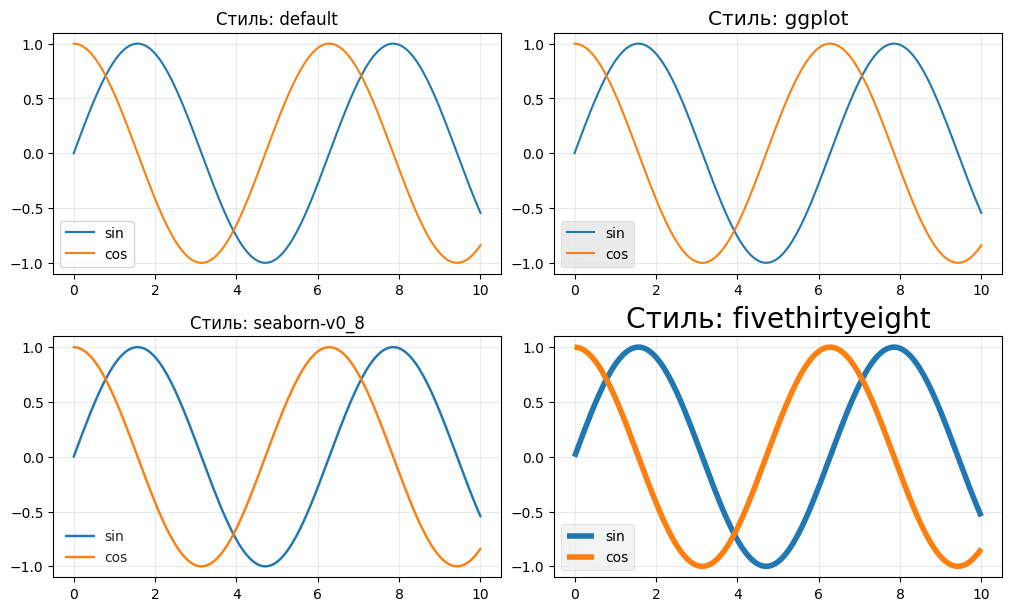

In [14]:
# Демонстрация разных стилей
x = np.linspace(0, 10, 200)
y1 = np.sin(x)
y2 = np.cos(x)

styles = ["default", "ggplot", "seaborn-v0_8", "fivethirtyeight"]
fig, axes = plt.subplots(2, 2, figsize=(10, 6), constrained_layout=True)
for ax, st in zip(axes.ravel(), styles):
    with plt.style.context(st):
        ax.plot(x, y1, label="sin")
        ax.plot(x, y2, label="cos")
        ax.set_title(f"Стиль: {st}")
        ax.legend()

plt.show()


## 16. Компоновка: `tight_layout`, `constrained_layout`, `GridSpec`

Покажем разную компоновку и использование `GridSpec` для гибкой сетки.


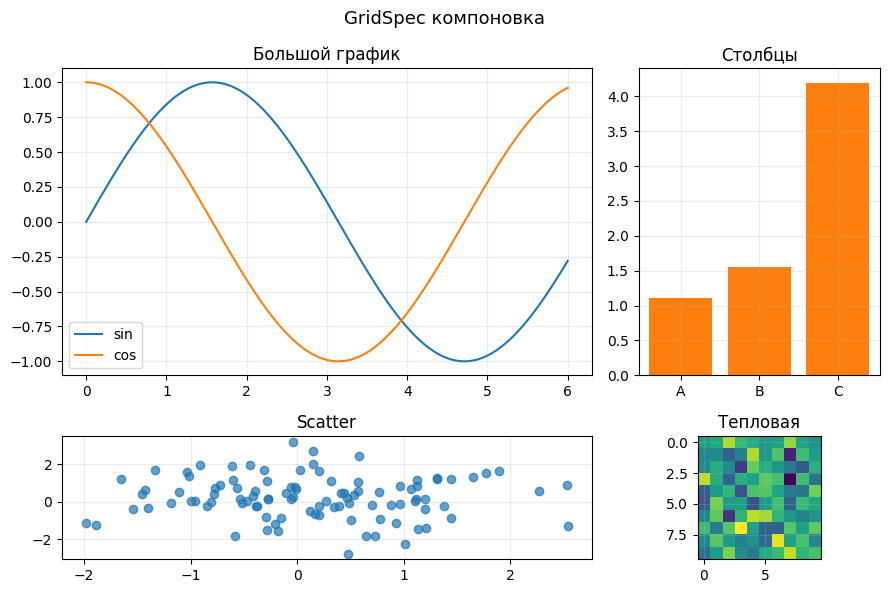

In [15]:
# GridSpec: сложная компоновка
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(9, 6))
gs = GridSpec(3, 3, figure=fig)

ax_main = fig.add_subplot(gs[:2, :2])      # большая область
ax_right = fig.add_subplot(gs[:2, 2])      # узкая справа
ax_bottom = fig.add_subplot(gs[2, :2])     # широкая снизу
ax_small = fig.add_subplot(gs[2, 2])       # маленькая справа снизу

x = np.linspace(0, 6, 300)
ax_main.plot(x, np.sin(x), label="sin")
ax_main.plot(x, np.cos(x), label="cos")
ax_main.set_title("Большой график")
ax_main.legend()

ax_right.bar(["A", "B", "C"], rng.uniform(1, 5, size=3), color="C1")
ax_right.set_title("Столбцы")

ax_bottom.scatter(rng.normal(size=100), rng.normal(size=100), alpha=0.7)
ax_bottom.set_title("Scatter")

ax_small.imshow(rng.normal(size=(10, 10)), cmap="viridis")
ax_small.set_title("Тепловая")

fig.suptitle("GridSpec компоновка", fontsize=13)
fig.tight_layout()
plt.show()


## 17. Легенды и пользовательские элементы легенды

Можно создавать легенды из произвольных элементов (например, `Line2D`) и настраивать расположение.


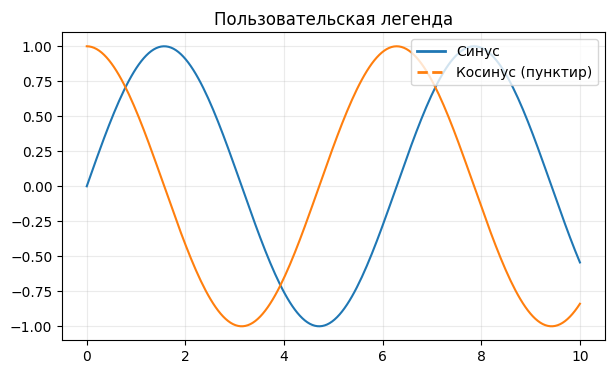

In [16]:
from matplotlib.lines import Line2D

x = np.linspace(0, 10, 200)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), color="C0")
ax.plot(x, np.cos(x), color="C1")

# Создадим произвольные элементы легенды
custom_lines = [
    Line2D([0], [0], color="C0", lw=2),
    Line2D([0], [0], color="C1", lw=2, linestyle="--"),
]
ax.legend(custom_lines, ["Синус", "Косинус (пунктир)"], loc="upper right", frameon=True)
ax.set_title("Пользовательская легенда")
plt.show()


## 18. Сохранение фигур (`savefig`)

Покажем как сохранять изображение с настройками DPI, фона и полей.


Сохранено в: example_matplotlib_export.png


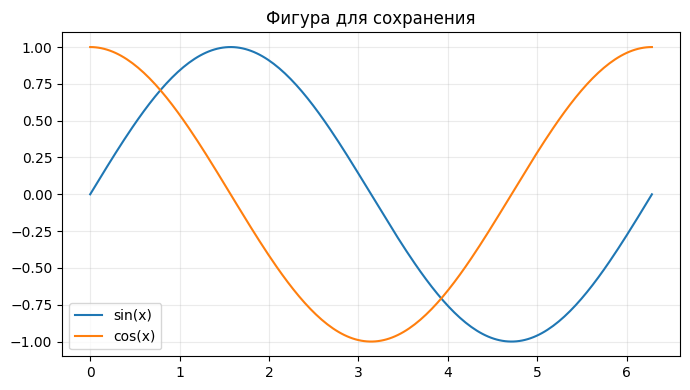

In [17]:
# Сохраним простую фигуру в файл
x = np.linspace(0, 2*np.pi, 200)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label="sin(x)")
ax.plot(x, np.cos(x), label="cos(x)")
ax.set_title("Фигура для сохранения")
ax.legend()
fig.tight_layout()

# Путь и параметры сохранения (файл появится рядом с ноутбуком)
output_path = "example_matplotlib_export.png"
fig.savefig(output_path, dpi=200, facecolor="white", bbox_inches="tight")
print(f"Сохранено в: {output_path}")
plt.show()


## 19. Строим красивый график)



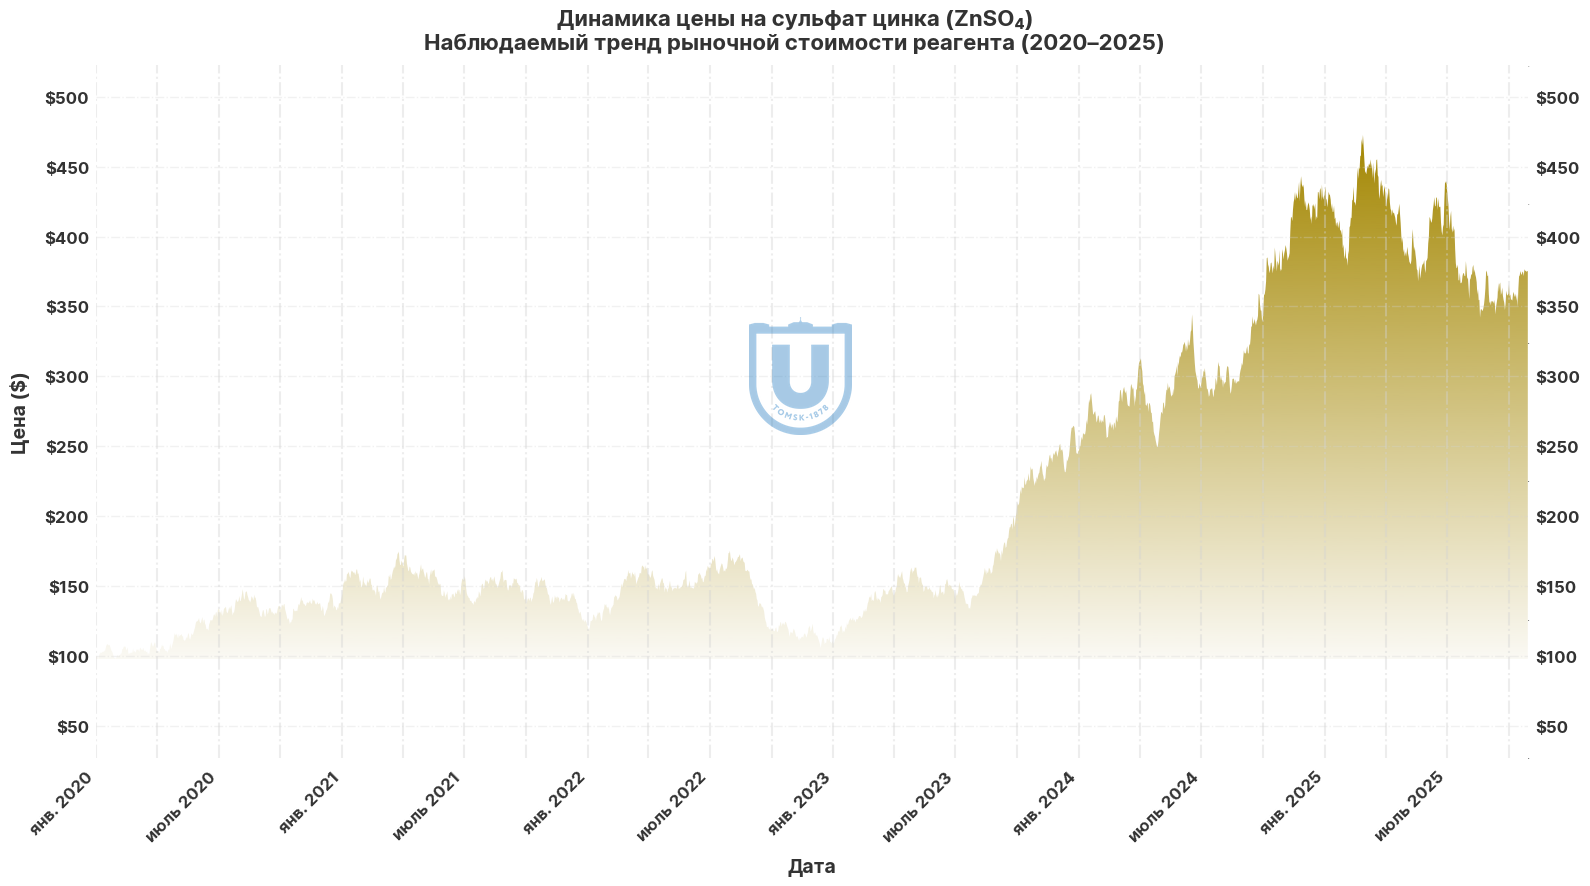

In [74]:
import warnings
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import matplotlib.image as mpimg

warnings.filterwarnings("ignore")

# ===== ПУТИ К РЕСУРСАМ =====
PATH_FONTS_BOLD = "/Users/norgey/Projects/Airi_TSU/airi-DS4chem/items/my_fonts/Inter/Inter-Bold.otf"
PATH_FONTS_REGULAR = "/Users/norgey/Projects/Airi_TSU/airi-DS4chem/items/my_fonts/Inter/Inter-Regular.otf"
PATH_ICONS = "/Users/norgey/Projects/Airi_TSU/airi-DS4chem/items/icons/"

# ===== ПАРАМЕТРЫ ЦВЕТА И СТИЛЯ =====
color_trend = '#A38600'  # золотой цвет для линии и заливки
COLOR_SIGNS_AXIS = '#333333'  # цвет для подписей осей
LABELSIZE_X_TICKS = 12
LABELSIZE_Y_TICKS_LEFT = 12

# ===== ГЕНЕРАЦИЯ ДАННЫХ: ГЕОМЕТРИЧЕСКОЕ БРОУНОВСКОЕ ДВИЖЕНИЕ (GBM) =====
# Начальная дата: 2020-01-01
start_date = dt.date(2020, 1, 1)
end_date = dt.date(2025, 10, 30)

# Количество торговых дней (примерно 252 в году)
num_days = (end_date - start_date).days
dates = np.array([start_date + dt.timedelta(days=i) for i in range(num_days)])

# Параметры GBM
initial_price = 100.0      # начальная цена
mu = 0.15                  # дрейф (годовая доходность ~15%)
sigma = 0.25               # волатильность (~25% в год)
dt_step = 1.0 / 252.0      # шаг времени в долях года (1 торговый день)

# Генерируем стохастические приращения
Z = rng.standard_normal(size=num_days - 1)
dW = np.sqrt(dt_step) * Z

# Вычисляем значения у по формуле GBM: S(t) = S(0) * exp((mu - 0.5*sigma^2)*t + sigma*W(t))
log_returns = (mu - 0.5 * sigma**2) * dt_step + sigma * dW
prices = initial_price * np.exp(np.cumsum(log_returns))
prices = np.concatenate([[initial_price], prices])

# ===== СОЗДАНИЕ ФИГУРЫ И ОСНОВНЫХ ОСЕЙ =====
fig, ax1 = plt.subplots(figsize=(16, 9))

# Основной график линии тренда цены на реагент
ax1.plot(dates, prices, color=color_trend, linewidth=2.5, alpha=0.9, label='Цена на реагент')

# ===== ГРАДИЕНТНАЯ ЗАЛИВКА ПОД КРИВОЙ =====
# Формируем массив точек для замкнутой области
numeric_x_patch = np.concatenate(([0], np.arange(len(prices)), [len(prices) - 1]))
y_patch = np.concatenate(([prices[0]], prices, [prices[-1]]))

# Переводим в числовые координаты для графика (используем индексы дат)
x_numeric = np.arange(len(dates))
vertices = np.column_stack([x_numeric, prices])

# Добавляем дно для замыкания пути
vertices_closed = np.vstack([
    vertices,
    [x_numeric[-1], prices.min() - (prices.max() - prices.min()) * 0.1],
    [x_numeric[0], prices.min() - (prices.max() - prices.min()) * 0.1]
])
path = Path(vertices_closed)

# Генерируем градиент (100 строк = 100 уровней по вертикали)
gradient = np.zeros((100, 1, 4))  # RGBA
# Преобразуем HEX в RGB
hex_color = color_trend
rgb = tuple(int(hex_color.lstrip('#')[i:i+2], 16) / 255 for i in (0, 2, 4))
gradient[:, 0, :3] = rgb
gradient[:, 0, 3] = np.linspace(0.05, 0.99, 100)  # альфа-канал от 5% до 99%

# Наносим градиент на график
y_min = prices.min()
y_max = prices.max()
img = ax1.imshow(
    gradient,
    aspect='auto',
    extent=[0, len(dates) - 1, y_min, y_max],
    origin='lower',
    zorder=0,  # под линией
    interpolation='bilinear'
)
# Обрезаем изображение по пути кривой
img.set_clip_path(path, transform=ax1.transData)

# ===== ПОЛУЧАЕМ И ФОРМАТИРУЕМ ТИКИ =====
# Получаем текущие тики и форматируем их
y_ticks = ax1.get_yticks()
y_ticks_formatted = [f"${tick:.0f}" for tick in y_ticks]

# ===== ДОБАВЛЯЕМ ВЕРТИКАЛЬНЫЕ ПУНКТИРНЫЕ ЛИНИИ НА НАЧАЛО КАЖДОГО КВАРТАЛА =====
# Генерируем даты начала каждого квартала (1 января, 1 апреля, 1 июля, 1 октября)
current_date = dt.date(start_date.year, 1, 1)
while current_date <= end_date:
    idx = (current_date - start_date).days
    if 0 <= idx < len(dates):
        ax1.axvline(x=idx, color='lightgray', linestyle='-.', linewidth=1.5, alpha=0.4)
    # Переходим на следующий квартал (на 3 месяца вперёд)
    if current_date.month <= 9:
        current_date = dt.date(current_date.year, current_date.month + 3, 1)
    else:
        current_date = dt.date(current_date.year + 1, (current_date.month + 3 - 12), 1)

# ===== ДОБАВЛЯЕМ ГОРИЗОНТАЛЬНЫЕ ПУНКТИРНЫЕ ЛИНИИ =====
# Горизонтальные линии сетки на уровне каждого тика оси Y
for level in y_ticks:
    ax1.axhline(y=level, color='lightgray', linestyle='-.', linewidth=1, alpha=0.3)

# ===== ФОРМАТИРОВАНИЕ ОСИ X (РУССКИЕ ДАТЫ) =====
# Установим метки каждые 6 месяцев
x_ticks_positions = []
x_ticks_labels_rus = []
current_date = start_date
while current_date <= end_date:
    # Находим индекс даты в массиве
    idx = (current_date - start_date).days
    if 0 <= idx < len(dates):
        x_ticks_positions.append(idx)
        # Форматируем дату по-русски: "янв. 2020"
        months_ru = ['янв.', 'февр.', 'март', 'апр.', 'май', 'июнь',
                     'июль', 'авг.', 'сент.', 'окт.', 'ноябр.', 'дек.']
        month_name = months_ru[current_date.month - 1]
        x_ticks_labels_rus.append(f"{month_name} {current_date.year}")
    # Переходим на 6 месяцев вперёд
    if current_date.month <= 6:
        current_date = dt.date(current_date.year, current_date.month + 6, 1)
    else:
        current_date = dt.date(current_date.year + 1, current_date.month - 6, 1)

ax1.set_xticks(x_ticks_positions)
ax1.set_xticklabels(x_ticks_labels_rus, rotation=45, ha='right')

# Оформим подписи осей с шрифтом Inter
inter_font_bold = FontProperties(fname=PATH_FONTS_BOLD, weight='bold', size=LABELSIZE_X_TICKS)
ax1.tick_params(axis='x', labelsize=11, length=0, pad=8)
for label in ax1.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontproperties(inter_font_bold)
    label.set_color(COLOR_SIGNS_AXIS)

# ===== ФОРМАТИРОВАНИЕ ОСИ Y (ЛЕВАЯ) =====
# Явно устанавливаем тики и подписи
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks_formatted)
inter_font_bold_y = FontProperties(fname=PATH_FONTS_BOLD, weight='bold', size=LABELSIZE_Y_TICKS_LEFT)
ax1.tick_params(axis='y', labelsize=11, length=0, pad=5)
for label in ax1.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color(COLOR_SIGNS_AXIS)
    label.set_fontproperties(inter_font_bold_y)

# ===== ДОБАВЛЯЕМ ВТОРУЮ ОСЬ Y (СПРАВА) =====
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
# Синхронизируем тики между осями: используем точно те же тики
ax2.set_yticks(y_ticks)
ax2.set_yticklabels(y_ticks_formatted)
ax2.tick_params(axis='y', labelsize=11, length=0, pad=5)
for label in ax2.get_yticklabels():
    label.set_fontweight('bold')
    label.set_color(COLOR_SIGNS_AXIS)
    label.set_fontproperties(inter_font_bold_y)

# ===== ДОБАВЛЯЕМ ТРЕТЬЮ НЕВИДИМУЮ ОСЬ ДЛЯ ОФОРМЛЕНИЯ =====
ax3 = ax1.twinx()
ax3.set_ylim(0, 1)
ax3.tick_params(axis='y', labelsize=0, length=0, pad=0)

# ===== СКРЫВАЕМ СПАЙНЫ (РАМКУ ГРАФИКА) И ОТКЛЮЧАЕМ СЕТКУ =====
for ax in [ax1, ax2, ax3]:
    # Отключаем сетку на всех осях
    ax.grid(False)
    # Скрываем рамку (спайны)
    for spine in ['right', 'left', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)

# ===== ДОБАВЛЯЕМ ЗАГОЛОВКИ И ПОДПИСИ =====
inter_font_title = FontProperties(fname=PATH_FONTS_BOLD, weight='bold', size=18)
ax1.set_xlabel('Дата', fontproperties=inter_font_title, fontsize=14, color=COLOR_SIGNS_AXIS, labelpad=10)
ax1.set_ylabel('Цена ($)', fontproperties=inter_font_title, fontsize=14, color=COLOR_SIGNS_AXIS, labelpad=10)

# Заголовок с указанием на цену реагента
title_font = FontProperties(fname=PATH_FONTS_BOLD, weight='bold', size=20)
fig.suptitle(
    'Динамика цены на сульфат цинка (ZnSO₄)\nНаблюдаемый тренд рыночной стоимости реагента (2020–2025)',
    fontproperties=title_font,
    fontsize=16,
    color=COLOR_SIGNS_AXIS,
    y=0.98
)

# ===== ДОБАВЛЯЕМ ЛОГОТИП TGU КАК ВОДЯНОЙ ЗНАК =====
try:
    logo = Image.open(PATH_ICONS + 'tgu.png')
    logo = logo.convert("RGBA")
    # Масштабируем логотип
    scale_factor = 0.25
    new_width = int(logo.width * scale_factor)
    new_height = int(logo.height * scale_factor)
    logo_resized = logo.resize((new_width, new_height), Image.LANCZOS)
    
    # Вычисляем позицию для центра фигуры
    fig_width, fig_height = fig.get_size_inches() * fig.dpi
    x_pos = (fig_width - new_width) / 2
    y_pos = (fig_height - new_height) / 2 + 60
    
    # Добавляем логотип на фигуру
    fig.figimage(logo_resized, x_pos, y_pos, alpha=0.4, zorder=10)
except Exception as e:
    print(f"Не удалось загрузить логотип: {e}")

plt.tight_layout()
plt.show()


!! Не забыть спросить найти ошибку на графике
